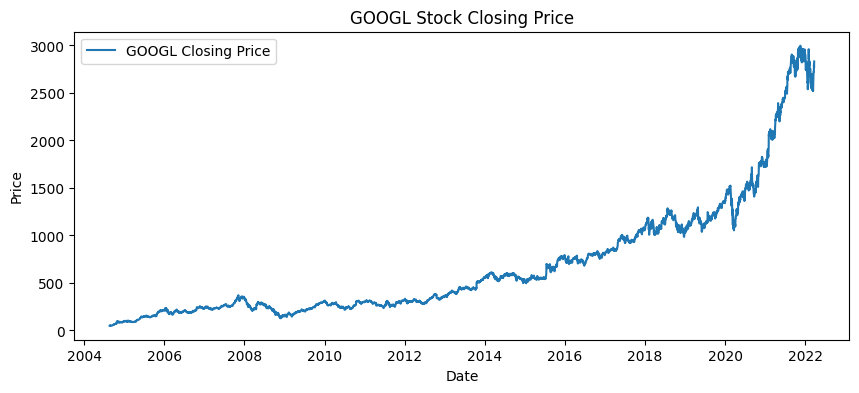

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3544
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12189.370
Date:                Thu, 17 Apr 2025   AIC                          24390.740
Time:                        08:41:56   BIC                          24427.777
Sample:                             0   HQIC                         24403.950
                               - 3544                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0494      0.009      5.213      0.000       0.031       0.068
ar.L2       3.978e-05      0.011      0.004      0.997      -0.021       0.021
ar.L3          0.0290      0.009      3.113      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


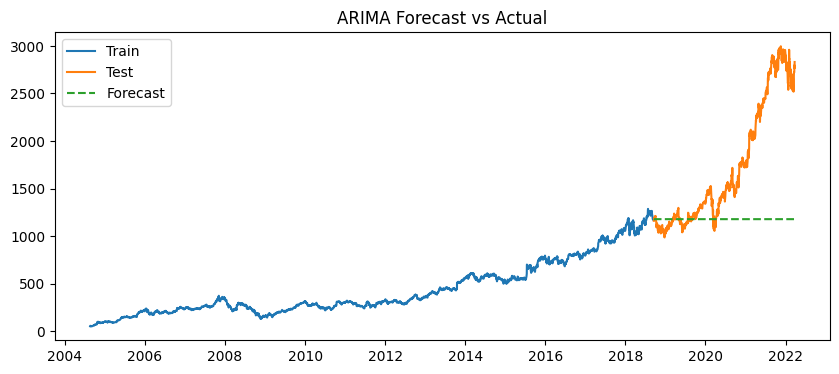

Root Mean Squared Error: 843.66


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

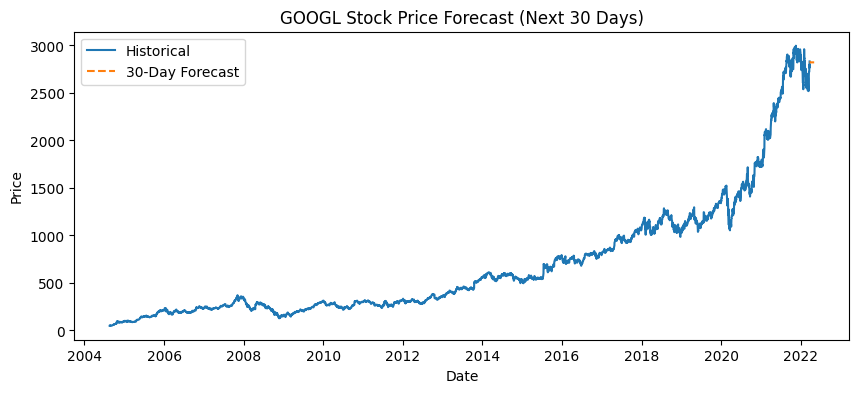

In [5]:
# 📚 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 📂 Load Your GOOGL Dataset
file_path = '/content/GOOGL.csv'  # Update path if needed
df = pd.read_csv(file_path)

# 🕒 Convert Date and Set as Index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 📊 Use Closing Price
data = df['Close'].dropna()

# 📈 Plot Closing Prices
plt.figure(figsize=(10, 4))
plt.plot(data, label='GOOGL Closing Price')
plt.title('GOOGL Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 🔀 Train/Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 🧠 ARIMA Model Order (p,d,q)
order = (5, 1, 0)

# 🤖 Fit ARIMA on Training Data
model = ARIMA(train, order=order)
model_fit = model.fit()
print(model_fit.summary())

# 🔮 Forecast on Test Data
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# 🖼️ Plot Actual vs Forecast
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

# 📉 Evaluate Performance
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse:.2f}')

# 🔮 Forecast Future 30 Days Using Full Data
final_model = ARIMA(data, order=order).fit()
future_forecast = final_model.forecast(steps=30)

# 📅 ✅ Fix: Create correct future date range
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')  # B = business days
future_forecast.index = future_dates

# 🖼️ Plot Historical + 30-Day Forecast
plt.figure(figsize=(10, 4))
plt.plot(data, label='Historical')
plt.plot(future_forecast, label='30-Day Forecast', linestyle='--')
plt.title('GOOGL Stock Price Forecast (Next 30 Days)')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
